## 1. $A$  AND $b$ conditions
For the $A$ matrix it is necessary that there is no linear relationship between its columns, so that the matrix $A^{T}A$ is invertible. On the other hand, must be a linear relation with $b$, for the nature of the data, this means there has to be a trend for the price of the bitcoin in time. For do predictions, is necessary that the data be represtative for the distribution of the future observations.

Talking about the system $Ax=b$, the solution to the least squares problem stablish $x=(A^TA)^{-1}A^T$. replacing that in the equation $$A(A^TA)^{-1}A^Tb=b$$ $$A(A^TA)^{-1}A^Tb-b=0$$ $$(A(A^TA)^{-1}A^T-I)b=0$$
This mean that a eign value of $A(A^TA)^{-1}A$ has to be close to 1.

## 2. Use data to predict bitcoin price

In [9]:
cd("C:/Users/JOHN VEGA/Documents/Machine Learning")

In [382]:
using CSV
using DataFrames

dataBitcoin = CSV.read("data/Bitcoin.csv",DataFrame);
dataBitcoin.Price .= replace.(dataBitcoin.Último, "." => "");
dataBitcoin.Price .= replace.(dataBitcoin.Price, "," => ".");
dataBitcoin.PriceFloat = parse.(Float64, dataBitcoin.Price);
dataBitcoin

,Fecha,Último,Apertura,Máximo,Mínimo,Vol.,% var.,Price,PriceFloat
,String15,String15,String15,String15,String15,String7,String7,String,Float64
1,01.01.2016,"434,0","429,0","436,5","426,3","12,97K","1,16%",434.0,434.0
2,02.01.2016,"432,7","434,0","435,8","430,0","6,38K","-0,29%",432.7,432.7
3,03.01.2016,"428,7","432,7","433,1","422,0","19,18K","-0,93%",428.7,428.7
4,04.01.2016,"432,9","428,6","435,7","427,0","13,02K","0,99%",432.9,432.9
5,05.01.2016,"431,8","432,9","434,9","428,2","11,22K","-0,24%",431.8,431.8
6,06.01.2016,"428,0","431,8","432,2","425,0","8,74K","-0,89%",428.0,428.0
7,07.01.2016,"459,0","428,9","461,9","427,1","55,66K","7,26%",459.0,459.0
8,08.01.2016,"454,0","458,8","465,0","446,8","30,45K","-1,10%",454.0,454.0
9,09.01.2016,"449,2","454,0","456,0","447,5","8,76K","-1,05%",449.2,449.2


I charged the Bitcoin serie, for the analysis would be considered the 01/01/2016-23/03/2022 serie with daily data.

In [383]:
dataBitcoin.Price

2273-element Vector{String}:
 "434.0"
 "432.7"
 "428.7"
 "432.9"
 "431.8"
 "428.0"
 "459.0"
 "454.0"
 "449.2"
 "449.4"
 "449.3"
 "432.0"
 "431.1"
 ⋮
 "38816.3"
 "37777.1"
 "39717.0"
 "39317.0"
 "41148.0"
 "40942.6"
 "41774.0"
 "42214.0"
 "41249.0"
 "41031.0"
 "42370.0"
 "42488.0"

The serie has a S-shape behavior

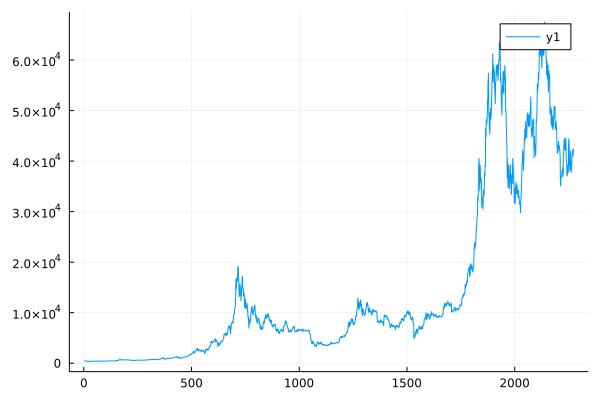

In [413]:
using Plots
dataBitcoin.PriceFloat[1:10]
plot(dataBitcoin.PriceFloat)


I take away the las 7 observations, in order to do the last week prediction, next I build the  $A$ matrix and the $b$ vector

In [386]:
N = size(dataBitcoin.PriceFloat,1)-7;
A = Array((1:N));
b = Array(dataBitcoin.PriceFloat[1:N]);
A = [ones(N,1) A];
println(A)
println(b)

[1.0 1.0; 1.0 2.0; 1.0 3.0; 1.0 4.0; 1.0 5.0; 1.0 6.0; 1.0 7.0; 1.0 8.0; 1.0 9.0; 1.0 10.0; 1.0 11.0; 1.0 12.0; 1.0 13.0; 1.0 14.0; 1.0 15.0; 1.0 16.0; 1.0 17.0; 1.0 18.0; 1.0 19.0; 1.0 20.0; 1.0 21.0; 1.0 22.0; 1.0 23.0; 1.0 24.0; 1.0 25.0; 1.0 26.0; 1.0 27.0; 1.0 28.0; 1.0 29.0; 1.0 30.0; 1.0 31.0; 1.0 32.0; 1.0 33.0; 1.0 34.0; 1.0 35.0; 1.0 36.0; 1.0 37.0; 1.0 38.0; 1.0 39.0; 1.0 40.0; 1.0 41.0; 1.0 42.0; 1.0 43.0; 1.0 44.0; 1.0 45.0; 1.0 46.0; 1.0 47.0; 1.0 48.0; 1.0 49.0; 1.0 50.0; 1.0 51.0; 1.0 52.0; 1.0 53.0; 1.0 54.0; 1.0 55.0; 1.0 56.0; 1.0 57.0; 1.0 58.0; 1.0 59.0; 1.0 60.0; 1.0 61.0; 1.0 62.0; 1.0 63.0; 1.0 64.0; 1.0 65.0; 1.0 66.0; 1.0 67.0; 1.0 68.0; 1.0 69.0; 1.0 70.0; 1.0 71.0; 1.0 72.0; 1.0 73.0; 1.0 74.0; 1.0 75.0; 1.0 76.0; 1.0 77.0; 1.0 78.0; 1.0 79.0; 1.0 80.0; 1.0 81.0; 1.0 82.0; 1.0 83.0; 1.0 84.0; 1.0 85.0; 1.0 86.0; 1.0 87.0; 1.0 88.0; 1.0 89.0; 1.0 90.0; 1.0 91.0; 1.0 92.0; 1.0 93.0; 1.0 94.0; 1.0 95.0; 1.0 96.0; 1.0 97.0; 1.0 98.0; 1.0 99.0; 1.0 100.0; 1.0 101

; 1.0 942.0; 1.0 943.0; 1.0 944.0; 1.0 945.0; 1.0 946.0; 1.0 947.0; 1.0 948.0; 1.0 949.0; 1.0 950.0; 1.0 951.0; 1.0 952.0; 1.0 953.0; 1.0 954.0; 1.0 955.0; 1.0 956.0; 1.0 957.0; 1.0 958.0; 1.0 959.0; 1.0 960.0; 1.0 961.0; 1.0 962.0; 1.0 963.0; 1.0 964.0; 1.0 965.0; 1.0 966.0; 1.0 967.0; 1.0 968.0; 1.0 969.0; 1.0 970.0; 1.0 971.0; 1.0 972.0; 1.0 973.0; 1.0 974.0; 1.0 975.0; 1.0 976.0; 1.0 977.0; 1.0 978.0; 1.0 979.0; 1.0 980.0; 1.0 981.0; 1.0 982.0; 1.0 983.0; 1.0 984.0; 1.0 985.0; 1.0 986.0; 1.0 987.0; 1.0 988.0; 1.0 989.0; 1.0 990.0; 1.0 991.0; 1.0 992.0; 1.0 993.0; 1.0 994.0; 1.0 995.0; 1.0 996.0; 1.0 997.0; 1.0 998.0; 1.0 999.0; 1.0 1000.0; 1.0 1001.0; 1.0 1002.0; 1.0 1003.0; 1.0 1004.0; 1.0 1005.0; 1.0 1006.0; 1.0 1007.0; 1.0 1008.0; 1.0 1009.0; 1.0 1010.0; 1.0 1011.0; 1.0 1012.0; 1.0 1013.0; 1.0 1014.0; 1.0 1015.0; 1.0 1016.0; 1.0 1017.0; 1.0 1018.0; 1.0 1019.0; 1.0 1020.0; 1.0 1021.0; 1.0 1022.0; 1.0 1023.0; 1.0 1024.0; 1.0 1025.0; 1.0 1026.0; 1.0 1027.0; 1.0 1028.0; 1.0 1029.0; 

1.0 1800.0; 1.0 1801.0; 1.0 1802.0; 1.0 1803.0; 1.0 1804.0; 1.0 1805.0; 1.0 1806.0; 1.0 1807.0; 1.0 1808.0; 1.0 1809.0; 1.0 1810.0; 1.0 1811.0; 1.0 1812.0; 1.0 1813.0; 1.0 1814.0; 1.0 1815.0; 1.0 1816.0; 1.0 1817.0; 1.0 1818.0; 1.0 1819.0; 1.0 1820.0; 1.0 1821.0; 1.0 1822.0; 1.0 1823.0; 1.0 1824.0; 1.0 1825.0; 1.0 1826.0; 1.0 1827.0; 1.0 1828.0; 1.0 1829.0; 1.0 1830.0; 1.0 1831.0; 1.0 1832.0; 1.0 1833.0; 1.0 1834.0; 1.0 1835.0; 1.0 1836.0; 1.0 1837.0; 1.0 1838.0; 1.0 1839.0; 1.0 1840.0; 1.0 1841.0; 1.0 1842.0; 1.0 1843.0; 1.0 1844.0; 1.0 1845.0; 1.0 1846.0; 1.0 1847.0; 1.0 1848.0; 1.0 1849.0; 1.0 1850.0; 1.0 1851.0; 1.0 1852.0; 1.0 1853.0; 1.0 1854.0; 1.0 1855.0; 1.0 1856.0; 1.0 1857.0; 1.0 1858.0; 1.0 1859.0; 1.0 1860.0; 1.0 1861.0; 1.0 1862.0; 1.0 1863.0; 1.0 1864.0; 1.0 1865.0; 1.0 1866.0; 1.0 1867.0; 1.0 1868.0; 1.0 1869.0; 1.0 1870.0; 1.0 1871.0; 1.0 1872.0; 1.0 1873.0; 1.0 1874.0; 1.0 1875.0; 1.0 1876.0; 1.0 1877.0; 1.0 1878.0; 1.0 1879.0; 1.0 1880.0; 1.0 1881.0; 1.0 1882.0; 1.0 

Using the $QR$ solution. $\beta$ is replaced in the equatio $Ax=b$ to stimate the $b_{1e}$ valors, $A\beta=b_{1e}$

In [417]:
β=A\b;
b_1e = A*β;

In the plot can be seen the estimate linear valors and the actual data.

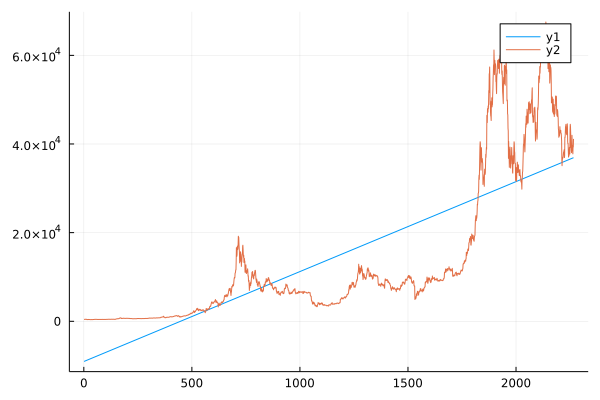

In [418]:
plot(1:N,[b_1e,b])

Using the S-shape logistic function: $f(x)=\frac{1}{1+e^{\frac{4N}{5}-x}}$, I transform the data to make it a linear problem $\hat{a_{i,2}}=\frac{1}{1+e^{\frac{4N}{5}-a_{i,2}}}$ for $i=1,2,\dots,N$. Now I have $A_2$ and stimate a new set of paramaters $\beta_2$ using again $QR$


In [419]:
A_2=1:N;
A_2=(exp.(-A_2.+4*N/5).+1).^(-1);
A_2 = [ones(N,1) A_2];
β_2=A_2\b

2-element Vector{Float64}:
  5959.862865770466
 39781.32520364158

I stimate the $b_{2e}$ valors using $\beta_2$: $A\beta_2=b_{2e}$. I compare the $b_{1e}$ and $b_{2e}$ errors, the error is bigger to $b_{1e}$

In [392]:
b_2e = A_2*β_2;
err2=b_2e-b
err=b_1e-b
[err2'*err2 err'*err]

1×2 Matrix{Float64}:
 7.79024e10  2.51168e11

It can be seen in a plot

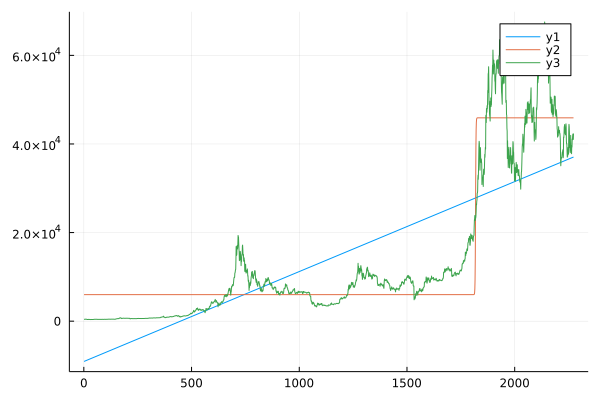

In [370]:
plot(1:N,[A_1,A_2e,b])

Predicting last week valors with $\beta_2$

In [395]:
d_ah=7
Apre=1:(N+d_ah)
Apre=(exp.(-Apre.+4*(N+d_ah)/5).+1).^(-1);
Apre=[ones((N+d_ah),1) Apre];
pre=Apre*β_2;
pre[N:N+d_ah]-dataBitcoin.PriceFloat[N:N+d_ah]

8-element Vector{Float64}:
 4593.188069412048
 4798.58806941205
 3967.188069412048
 3527.188069412048
 4492.188069412048
 4710.188069412048
 3371.188069412048
 3253.188069412048

For the logistic data transformation I used a $\frac{4N}{5}$ parameter, I arbitrary choose it, it could be improve.

## 3. Bitcoin price relation with some commodities 

Charging the last year data for silver, coffe, gold and oil

In [422]:
using CSV
using DataFrames

dataCafe = CSV.read("data/Cafe.csv",DataFrame);
dataCafe.Price.= replace.(dataCafe.Último, "." => "");
dataCafe.Price.= replace.(dataCafe.Price, "," => ".");
dataCafe.PriceFloat = parse.(Float64, dataCafe.Price);
dataSilver = CSV.read("data/Plata.csv",DataFrame);
dataSilver.Price.= replace.(dataSilver.Último, "." => "");
dataSilver.Price.= replace.(dataSilver.Price, "," => ".");
dataSilver.PriceFloat = parse.(Float64, dataSilver.Price);
dataOil = CSV.read("data/Petroleo.csv",DataFrame);
dataOil.Price.= replace.(dataOil.Último, "." => "");
dataOil.Price.= replace.(dataOil.Price, "," => ".");
dataOil.PriceFloat = parse.(Float64, dataOil.Price);
dataGold = CSV.read("data/Oro.csv",DataFrame);
dataGold.Price.= replace.(dataGold.Último, "." => "");
dataGold.Price.= replace.(dataGold.Price, "," => ".");
dataGold.PriceFloat = parse.(Float64, dataGold.Price);
dataGold


,Fecha,Último,Apertura,Máximo,Mínimo,Vol.,% var.,Price,PriceFloat
,String15,String15,String15,String15,String15,String7,String7,String,Float64
1,23.03.2021,"1.736,50","1.738,00","1.738,00","1.734,30","0,01K","-0,74%",1736.50,1736.5
2,24.03.2021,"1.744,20","1.742,40","1.742,40","1.742,20","0,00K","0,44%",1744.20,1744.2
3,25.03.2021,"1.736,10","1.745,10","1.745,10","1.745,10","0,01K","-0,46%",1736.10,1736.1
4,26.03.2021,"1.743,20","1.732,50","1.740,50","1.728,10","0,00K","0,41%",1743.20,1743.2
5,29.03.2021,"1.723,30","1.732,80","1.732,80","1.720,00","0,00K","-1,14%",1723.30,1723.3
6,30.03.2021,"1.694,30","1.700,00","1.700,00","1.693,50","0,02K","-1,68%",1694.30,1694.3
7,31.03.2021,"1.723,90","1.688,40","1.723,10","1.688,40","0,02K","1,75%",1723.90,1723.9
8,01.04.2021,"1.736,80","1.732,00","1.739,90","1.732,00","0,00K","0,75%",1736.80,1736.8
9,05.04.2021,"1.737,70","1.737,20","1.737,20","1.737,20","0,01K","0,05%",1737.70,1737.7


Joining the datas in a single dataset. I use the date field as key, despite to be for all the sets daily data, for some commodities are different valors.

In [423]:
rename!(dataGold, fill(:a, 9), makeunique=true);
rename!(dataSilver, fill(:b, 9), makeunique=true);
rename!(dataOil, fill(:c, 9), makeunique=true);
rename!(dataCafe, fill(:d, 9), makeunique=true);
K=innerjoin(dataGold, dataSilver, on=:a=>:b);
K1=innerjoin(K, dataOil, on=:a=>:c);
K2=innerjoin(K1, dataCafe, on=:a=>:d);
K3=innerjoin(K2, dataBitcoin, on=:a=>:Fecha);
Nc=size(K3.a,1);
Ac=[ones(size(K3.a,1),1) 1:size(K3.a,1) Array(K3.a_8) Array(K3.b_8) Array(K3.c_8) Array(K3.d_8)];
Bc=Array(K3.PriceFloat);
println(Bc);
size(Ac);

[54331.0, 52347.2, 51363.0, 54992.9, 57672.3, 58841.0, 58796.0, 58727.4, 59145.0, 57991.0, 55960.0, 58110.0, 58114.0, 59900.0, 63518.0, 62942.7, 63196.0, 61325.0, 55639.0, 56476.0, 53822.0, 51781.3, 51139.0, 54103.0, 55044.0, 54860.0, 53566.0, 57637.0, 57147.0, 53264.0, 57477.0, 56451.0, 57349.0, 55851.0, 56715.0, 49725.0, 49747.0, 49917.0, 43544.0, 42935.0, 36755.0, 40578.0, 37415.0, 38772.9, 38363.0, 39301.0, 38435.0, 35667.0, 36672.6, 37590.0, 39209.0, 36854.0, 33596.0, 33415.0, 37347.0, 36649.2, 37338.0, 40500.0, 40139.0, 38332.0, 38061.0, 35802.0, 31761.0, 32553.0, 33703.0, 34656.6, 31584.0, 34484.0, 35895.9, 35043.5, 33554.4, 33816.0, 34140.0, 33886.0, 32873.9, 33769.0, 33090.0, 32727.0, 32822.6, 31857.0, 31429.0, 30847.0, 29806.1, 32141.0, 32320.0, 33597.1, 37296.0, 39563.0, 40004.0, 40041.0, 42169.0, 39156.0, 38207.0, 39754.0, 40887.0, 42830.0, 46293.0, 45612.0, 45546.0, 44423.0, 47842.0, 45940.0, 44698.0, 44744.0, 46765.0, 49332.0, 49539.0, 47714.0, 48989.0, 46832.0, 49076.1, 

With a scatter plot can be seen the possible relation of the commodities with the bitcoin price. Gold  and oil displays a negative relationship. For coffe an silver is not clare

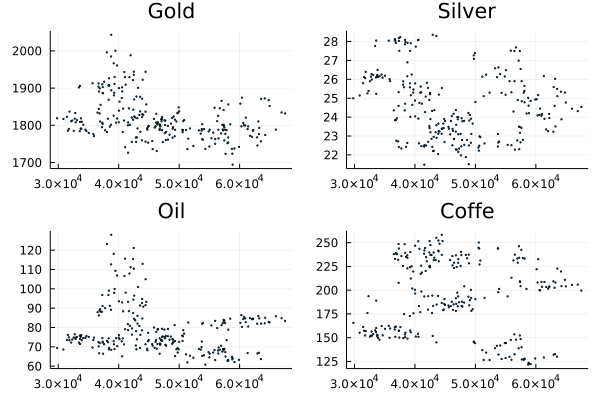

In [427]:
using DelimitedFiles
ga=scatter(Bc,Array(K3.a_8),markersize=1,title="Gold")
gb=scatter(Bc,Array(K3.b_8),title="Silver",markersize=1);
gc=scatter(Bc,Array(K3.c_8),title="Oil",markersize=1);
gd=scatter(Bc,Array(K3.d_8),title="Coffe",markersize=1);

g=plot(ga,gb,gc,gd, legend=:none)



We stimate $\beta_c$ paramaters ($c$ is for commoditie). time, silver and gold presents negative valors, in the other hand, coffe and gold has possitive relationships

In [424]:
βc=Ac\Bc

6-element Vector{Float64}:
 130278.47459077269
    -96.76185190985727
    -48.35843613676225
   -899.9396950494792
    210.38160286178226
    116.36444371081718

In a plot we compare the stimated valors $b_{ce}$ with the actual data

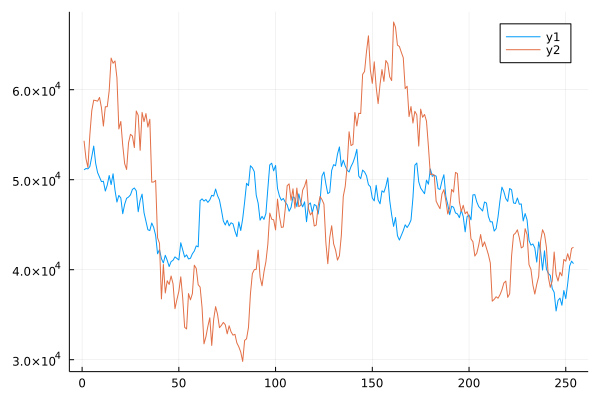

In [428]:
b_ce=Ac*βc;
er=b_ce-Bc;
Ac*βc;
plot(1:Nc,[Ac*βc,Bc])


I tried several functional forms offscreen, based on the scratter plots. The best performance that I found was with this:

The coffe prices got worse the stimations. So the equation looks: $Btc_t=\beta_0+\beta_1 t+\beta_2\frac{1}{gold_t}+\beta_3silver_t^2+\beta_4silver_t+\beta_5ln(oil_t)$ 

In [430]:
K3.a_9=(K3.a_8).^-1;
K3.c_9=log.(K3.c_8);
K3.b_9=(K3.d_8).^2;
Ac2=[ones(size(K3.a,1),1) 1:size(K3.a,1) Array(K3.a_9) Array(K3.b_9) Array(K3.b_8) Array(K3.c_9) ];
βc2=Ac2\Bc


6-element Vector{Float64}:
 -83173.17091777225
    -85.10059437500111
      1.6258686541490152e8
      0.29303538339899193
   -726.2145603968137
  13298.495460434764

In red the actual values, in blue the first model and in green the second model

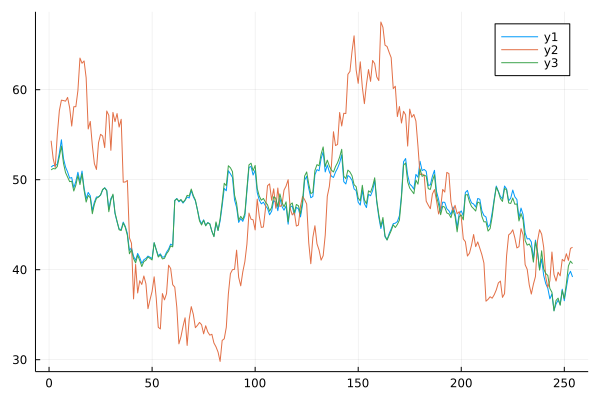

In [360]:
er2=Ac2*βc2-Bc;
Ac2*βc2;
plot(1:Nc,[Ac2*βc2,Bc,Ac*βc])


The second model has better performance as the squared errors are minor.

In [361]:
[er2'*er2 er'*er]

1×2 Matrix{Float64}:
 17913.4  17944.2

In [3]:
using Plots

plotlyjs()

WebIO._IJuliaInit()

Plots.PlotlyJSBackend()

In first place, I generated the set of points for wich I will test the solution of the point set registration problem

In [144]:
t = range(0, stop = 1, length = 100)
θ = (6π) .* t
x = t .* cos.(θ)
y = t .* sin.(θ)
p1 = plot(x, y, line_z = t, linewidth = 3, legend = false)
p2 = scatter(x, y, marker_z = (+), color = :bluesreds, legend = false)
plot(p1, p2)


Now I alter the set of points $Y$ with a random rotation matrix $T$, a random scalar $k$ in $[a,b]$ range and a random traslation vector $d$ in $[a_1,b_1]x[a_2,b_2]$. Also, I introduced a error term wich represents a corruption in the data

In [369]:
a=-2;
b=2;
a_1=-5;
b_1=5;
a_2=-2;
b_2=2
N=size(x)[1];
h=ones(N,1);
Y=[x y];
error=randn(100,2)/50
angle_t=acos(rand())
T=[cos(angle_t) -sin(angle_t); sin(angle_t) cos(angle_t)];
k=a-(a-b)rand();
d=[a_1 a_2]-rand(Float64, (1,2)).*[(a_1-b_1) (a_2-b_2)]
X=k*Y*T+h*d+error;
scatter([X[1:N,1],X[1:N,2]]..., legend=nothing, color="blue")
scatter!([Y[1:N,1],Y[1:N,2]]..., color="red")


Now I start to stablish the necessary variables for the solution taking as reference S. Umeyama, Least-Squares Estimation of Transformation Parameters Between Two Point Patterns, IEEE Trans. Pattern Anal. Mach. Intell., vol. 13, no. 4, 1991.

So, I create, $\mu_y,\mu_x$ mean vectors, $\sigma_x$ and $\sigma_y$ variance around mean vectors, $\Sigma_{xy}$ the covariance matrix, the $UDV$ descompotition of $\Sigma_{xy}$ and $S$ witch could be the identity matrix $I$ or a diagonal matrix with $diag(1,1,\dots,1,-1)$ depending on $det(U)det(V)$ sign



In [370]:
using Convex, SCS
using LinearAlgebra

μ_y=[sum(x)/N sum(y)/N];
μ_x=[sum(X[1:N,1])/N sum(X[1:N,2])/N]
σ_x=ones(N,1);
for i in 1:N
σ_x[i,1]=norm(X[i,1:2]'-μ_x)^2
end
σ_x=sum(σ_x)/N
σ_y=ones(N,1);
for i in 1:N
σ_y[i,1]=norm(Y[i,1:2]'-μ_y)^2
end
σ_y=sum(σ_y)/N;

Σ=zeros(2,2);
for i in 1:N
Σ=(X[i,1:2]'-μ_x)'*(Y[i,1:2]'-μ_y)+Σ;
end
Σ_xy=Σ/N;
signo_=abs(det(Σ_xy))/det(Σ_xy);
S=triu(tril(ones(size(Σ_xy)[1], size(Σ_xy)[1])));
S[size(Σ_xy)[1], size(Σ_xy)[1]]=signo_;
S;
F=svd(Σ_xy)
signo=det(F.U)*det(F.V)/abs(det(F.U)*det(F.V))
S[size(Σ_xy)[1], size(Σ_xy)[1]]=signo
det(F.V)

-1.0000000000000002

With this we can create the paramaters of the transformation stimated by the least-squares solution, the $R$ rotation matrix, the $c$ scaling number and the $t$ traslation vector


In [371]:
R=F.U*S*F.V;
c=sum(diag(diagm(F.S)*S))/σ_x;
t=μ_y-c*μ_x*R;
det(Σ_xy)
R

2×2 Matrix{Float64}:
 -0.262136  -0.965031
  0.965031  -0.262136

Now transforming the $X$ matrix in the $X_E$ using the $R,t,c$ paramaters $X_E=cXR+ht$.
And calculing the $err$ error of the $X_E$ matrix against $Y$, $err=\sum_{i=1}^{N}||X_E-Y||$

In [372]:
h=ones(N,1);
X_E=c*X*R+h*t
err=0;
for i in 1:N
err=norm(X_E[i,1:2]-Y[i,1:2])+err;
end
py_e=scatter(X_E[1:N,1],X_E[1:N,2]);
px=scatter(X[1:N,1],X[1:N,2]);;
plot(px,py_e,p2)


In [373]:
angle_n=acos(R[2,2])
R_n=[cos(angle_n) -sin(angle_n); sin(angle_n) cos(angle_n)]
if abs(det(R_n-R))<0.0000001
    angle_n=acos(R[2,2])
else
    angle_n=-acos(R[2,2])
end
angle_n-acos(R[2,2])
max_x=maximum([maximum(X[1:N,1]) maximum(Y[1:N,1])])
max_y=maximum([maximum(X[2:N,1]) maximum(Y[2:N,1])])
min_y=minimum([minimum(X[2:N,1]) minimum(Y[2:N,1])])
min_x=minimum([minimum(X[1:N,1]) minimum(Y[1:N,1])])

-2.5054307523000956

Now I create an animation of the fitting process making $n$ steps for the angle of $R$, the $c$ scalar and the $t$ vector, making small transformation in every $i$ to $X$ and finalicing with $X_E$

┌ Info: Saved animation to 
│   fn = C:\Users\JOHN VEGA\tmp.gif
└ @ Plots C:\Users\JOHN VEGA\.julia\packages\Plots\8K4be\src\animation.jl:114


Plots.AnimatedGif("C:\\Users\\JOHN VEGA\\tmp.gif")
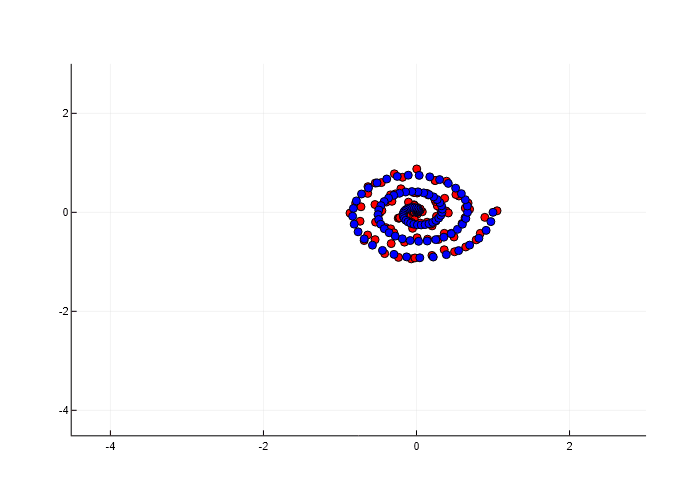

In [376]:
using Plots
n=100
anim= @animate for i=0:n
angle_i=i*angle_n/n
R_i=[cos(angle_i) -sin(angle_i); sin(angle_i) cos(angle_i)];
c_i=c^(i/n);
t_i=t*i/n
X_E=c_i*X*R_i+h*t_i
scatter([X_E[1:N,1],X_E[1:N,2]]..., legend=nothing, color="red",xlims = (min_x-2, max_x+2),ylims = (min_y-2, max_y+2))
scatter!([Y[1:N,1],Y[1:N,2]]..., color="blue")
scatter!([X[1:N,1],X[1:N,2]]..., color="yellow")
end
gif(anim, fps=30)